In [4]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:


# Carregar os dados
r_cols = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('data.csv', sep='\t', names=r_cols, usecols=range(3))

m_cols = ['movie_id', 'title']
movies = pd.read_csv('item.csv', sep='|', names=m_cols, usecols=range(2), encoding='ISO-8859-1')

ratings = pd.merge(movies, ratings)

In [6]:

# Criar tabela dinâmica de avaliações
movieRatings = ratings.pivot_table(index=['user_id'], columns=['title'], values=['rating'])
movieRatings.columns = movieRatings.columns.get_level_values(1)

# Avaliações de um conjunto de filmes
selected_movies = ['Star Wars (1977)', 'Toy Story (1995)', 'Schindler\'s List (1993)']
similarMovies = pd.Series(dtype=float)

for movie in selected_movies:
    movieRatingsForFilm = movieRatings[movie]
    sims = movieRatings.corrwith(movieRatingsForFilm)
    similarMovies = pd.concat([similarMovies, sims])

similarMovies = similarMovies.groupby(similarMovies.index).mean()  # Média de similaridade
similarMovies = similarMovies.dropna()

c:\Users\daneil\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\daneil\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\daneil\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\daneil\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\daneil\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\daneil\AppData\Local\Programs\Python\Python311\Lib

In [7]:



# Estatísticas dos filmes (simplificando os níveis das colunas)
movieStats = ratings.groupby('title').agg({'rating': [np.size, np.mean]})
movieStats.columns = movieStats.columns.droplevel()  # Remover o nível superior das colunas
popularMovies = movieStats['size'] >= 100

# Filmes populares com alta média de avaliação
highlyRatedMovies = movieStats['mean'] >= 4.0

# Juntar estatísticas e similaridade
df = movieStats[popularMovies & highlyRatedMovies].join(pd.DataFrame(similarMovies, columns=['similarity']), how='right')

# Ordenar e exibir os filmes mais semelhantes
df = df.sort_values(by='similarity', ascending=False)
print("Top 15 Filmes Mais Semelhantes:")
print(df.head(15))


Top 15 Filmes Mais Semelhantes:
                                         size  mean  similarity
Commandments (1997)                       NaN   NaN         1.0
Wooden Man's Bride, The (Wu Kui) (1994)   NaN   NaN         1.0
Infinity (1996)                           NaN   NaN         1.0
Stranger, The (1994)                      NaN   NaN         1.0
Cosi (1996)                               NaN   NaN         1.0
Anna (1996)                               NaN   NaN         1.0
Nï¿½nette et Boni (1996)                  NaN   NaN         1.0
Nico Icon (1995)                          NaN   NaN         1.0
Mr. Jones (1993)                          NaN   NaN         1.0
Mondo (1996)                              NaN   NaN         1.0
Hunted, The (1995)                        NaN   NaN         1.0
Machine, The (1994)                       NaN   NaN         1.0
Bent (1997)                               NaN   NaN         1.0
Golden Earrings (1947)                    NaN   NaN         1.0
Locusts,

C:\Users\daneil\AppData\Local\Temp\ipykernel_5640\2349363918.py:2: FutureWarning: The provided callable <function mean at 0x0000023D3DCFF6A0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  movieStats = ratings.groupby('title').agg({'rating': [np.size, np.mean]})


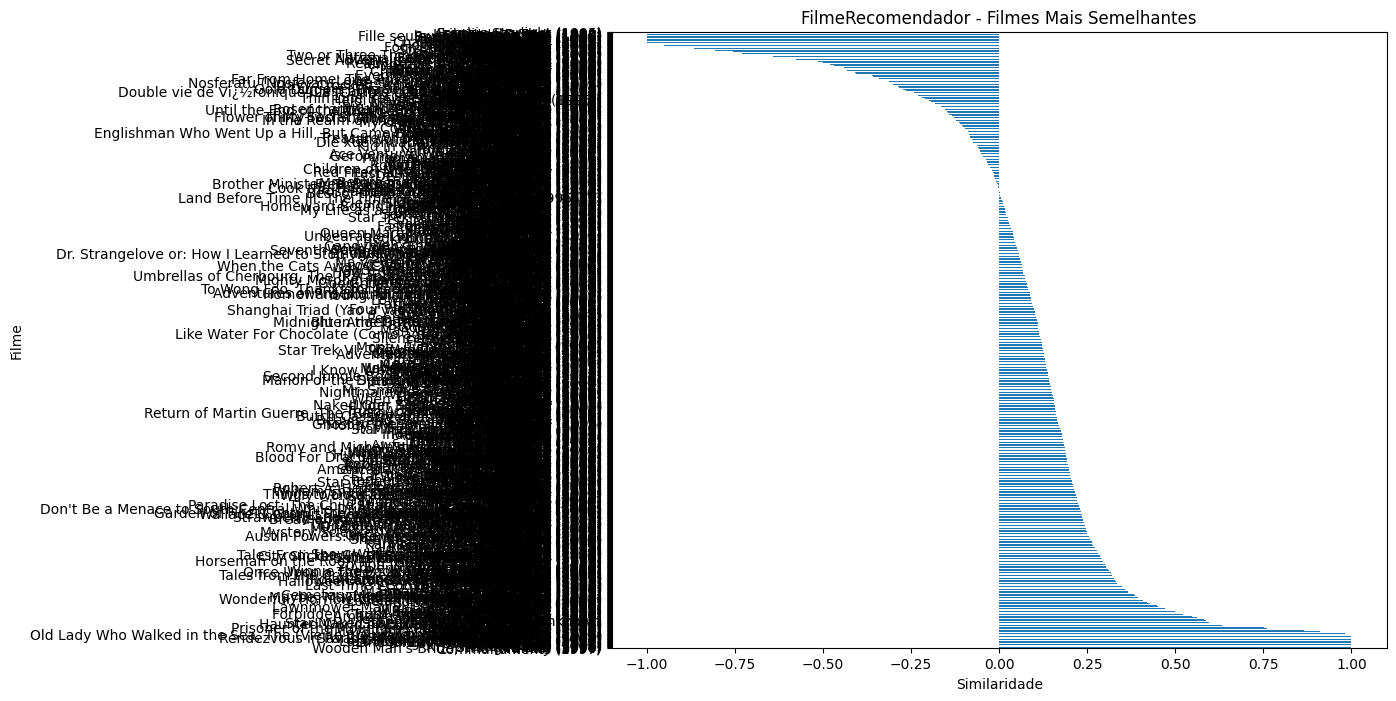

In [8]:

# Visualizar os resultados
df['similarity'].plot(kind='barh', figsize=(10, 8))
plt.title('FilmeRecomendador - Filmes Mais Semelhantes')
plt.xlabel('Similaridade')
plt.ylabel('Filme')
plt.show()
